In [7]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from astropy.table import Table
#from matplotlib import style
from collections import Counter
#style.use('fivethirtyeight')

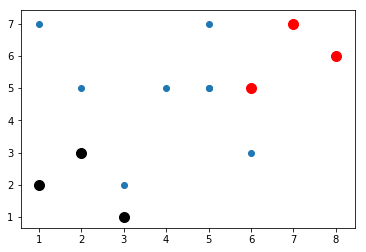

In [7]:
dataset = {'k':[[1,2],[2,3],[3,1]],'r':[[6,5],[7,7],[8,6]]}
new_features = [[5,7],[3,2],[6,3],[1,7],[2,5],[5,5],[4,5],[5,5]]
new_features=np.array(new_features)
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[:,0],new_features[:,1])
#plt.scatter(new_features[0],new_features[1])
plt.show()



In [4]:
t = Table.read('vizier_votable.vot', format='votable')
print(t.colnames)

RA = t['_RAJ2000']
DEC = t['_DEJ2000']


['_RAJ2000', '_DEJ2000', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx', 'pmRA', 'pmDE', 'RADEcor', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var']


In [8]:
def nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_dist = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_dist, group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

coords = np.array([RA,DEC])
for test in coords:
    result = nearest_neighbors(dataset, coords[test],k=3)
    print(result)
    plt.scatter(coords[test,0],coords[test,1], color=result)
    
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]

plt.show()

IndexError: arrays used as indices must be of integer (or boolean) type

In [1]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices



array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

In [17]:
from scipy import spatial
from scipy.spatial import KDTree

test_data = [np.random.rand(20),np.random.rand(20)]
print(test_data)

test_data = np.array(test_data)

X, Y = np.meshgrid(test_data[:,0],test_data[:,1])

print(X,Y)

tree = spatial.KDTree(zip(test_data[:,0],test_data[:,1]))


[array([ 0.21867628,  0.16981148,  0.28505843,  0.22005272,  0.00339382,
        0.7086689 ,  0.83634122,  0.93401919,  0.16116172,  0.38917278,
        0.95798293,  0.44389269,  0.72203283,  0.85106821,  0.29693985,
        0.95016568,  0.15236378,  0.56601517,  0.94073752,  0.09953866]), array([ 0.40357529,  0.03371817,  0.02160047,  0.47216931,  0.26828593,
        0.39920784,  0.13827562,  0.19334024,  0.72570244,  0.16869156,
        0.82860344,  0.87243216,  0.52964561,  0.91279827,  0.65933703,
        0.5789458 ,  0.29966509,  0.78722819,  0.26766267,  0.13113933])]
[[ 0.21867628  0.40357529]
 [ 0.21867628  0.40357529]] [[ 0.16981148  0.16981148]
 [ 0.03371817  0.03371817]]


ValueError: not enough values to unpack (expected 2, got 0)

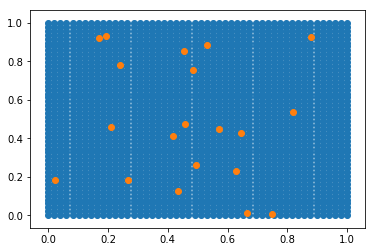

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.02040816  0.04081633  0.06122449  0.08163265]]



 [[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.02040816  0.04081633  0.06122449  0.08163265  0.10204082
   0.12244898  0.14285714  0.16326531  0.18367347  0.20408163  0.2244898
   0.24489796  0.26530612  0.28571429  0.30612245  0.32653061  0.34693878
   0.36734694  0.3877551   0.40816327  0.42857143  0.44897959  0.46938776
   0.48979592

In [196]:
import numpy as np

#np.random.seed(0)
data = np.random.random((20, 2))  # 10 points in 3 dimensions
tree = KDTree(data,2)              
dist, ind = tree.query(data[0], k=3) 
# print(dist,ind)
# print(data)

data = np.array(data)
# Xgrid, Ygrid = np.meshgrid(X[:,0],X[:,1])
# griddata = np.array([Xgrid,Ygrid])

xgrid = np.linspace(0,1)
ygrid = np.linspace(0,1)
X, Y = np.meshgrid(xgrid,ygrid)
plt.scatter(X,Y)
plt.scatter(data[:,0],data[:,1])
plt.show()
#print('\n here is X\n',X)

#for i in range(len(X)):
    
X = np.array(X)
Y = np.array(Y)

#print(Y[0,0:len(Y)])
#print(X[0,0:len(X)])
array = [Y[0,0:len(Y)],X[0,0:len(X)]]
array = np.array(array)
print(array[0:5,0:5])
np.transpose(array)
print('\n\n\n',array,'\n\nLast Print command \n\n',array[1,1],'\n\n')
#array = [X[0,0:(len(X[0]))],(Y[0,0]*len(Y[0]))]
#array = np.array(array)
#print(array[0:,])
#print(array[1,1:len(array[1])])

test_array = []
for i in (array[1,0:len(array[1])]):
    test_array.append([i,0])
    
test_array = np.array(test_array)


# test = [[2,1],[4,6],[1,1]]
# print(np.size(test))


[[ 0.          0.19662693  0.29473397]]
